<a href="https://colab.research.google.com/github/Mafaz03/Model/blob/main/Trailer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Backed Upon : https://www.thinkwithgoogle.com/feature/youtube-ad-sequencing-and-ad-recall/ad-sequencing?lang=en_US

#1. Import Dependencies

##1.1. Download Dependencies

In [ ]:
!pip install pytube opencv-python
!pip install moviepy

##1.2. Import Dependencies

In [ ]:
import cv2
import pytube
from pytube import YouTube
import matplotlib.pyplot as plt
import numpy as np

import os
from os.path import isfile, join

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from moviepy.editor import *

#2. Youtube Downloading functions

In [ ]:
def download_video(url, output_path):
  """
  Downloads Video provided the url
  """
  try:
    yt = YouTube(url)
    stream = yt.streams.filter(file_extension='mp4', res='360p').first()
    stream.download(output_path)
    return True
  except Exception as e:
    print(f"Error downloading video: {e}")
    return False



def download_frames(video_path, output_folder):
  """
  Downloads and reads the frame provided the video path
  """
  try:
    video = cv2.VideoCapture(video_path)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame_number in range(frame_count):
      success, frame = video.read()
      if not success:
          break
      frame_file_path = f"{output_folder}/frame_{frame_number:04d}.jpg"
      cv2.imwrite(frame_file_path, frame)

    video.release()
    return True
  except Exception as e:
    print(f"Error downloading frames: {e}")
    return False


def download(url):
  if __name__ == "__main__":
    youtube_url = url
    output_path = "./video.mp4"  # desired output path
    output_folder = "./frames"   # desired output folder

    # Download the video
    if download_video(youtube_url, output_path):
      # Download frames
      if download_frames(output_path, output_folder):
        print("Frames downloaded successfully.")
      else:
        print("Failed to download frames.")
    else:
      print("Failed to download video.")


#3. Frame Pixelation Function

In [ ]:
def pixelate_bw(image : np.ndarray , pixel_size : int , thres : int) -> np.ndarray:

  """
  Takes in array of image and returns binary BW pixelated array
  """

  height, width = image.shape[:2]
  w, h = (pixel_size , pixel_size)
  bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thres , image = cv2.threshold(bw_image,thres,255,cv2.THRESH_BINARY)
  image_pixel = cv2.resize(image, (w, h), interpolation=cv2.INTER_LINEAR)
  output = cv2.resize(image_pixel , ( int(width/3) , int(height/3) ), interpolation=cv2.INTER_NEAREST)
  return output

#4. Intensity Analysis Function

In [ ]:
def intensity(path : str) -> (int , np.ndarray , np.ndarray ) :

  """
  Goes through a video and returns list of intensity of a frame with respect to the next frame
  """

  cap = cv2.VideoCapture(path)
  video_clip = VideoFileClip(path)
  intensity_per_frame = []
  audio_array = video_clip.audio.to_soundarray()

  frame_file_path = "/content/video.mp4"
  count = 0
  while cap.isOpened():
    try:
      ret,frame = cap.read()
      frame_bw = pixelate_bw(image = frame , pixel_size = 30 , thres = 200)
      intensity_per_frame.append(frame_bw.sum())
      frame_file_path = f"/content/video_{count}.jpg"
      # cv2.imwrite(frame_file_path, frame_bw)

      count = count + 1
    except:
      break
  x = np.array(intensity_per_frame)

  x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
  audio_per_frame = audio_array[:,0][(audio_array.shape[0] - count) : ]
  y_norm = (audio_per_frame-np.min(audio_per_frame))/(np.max(audio_per_frame)-np.min(audio_per_frame))

  return count , x_norm , y_norm

#5. Testing with one URL

In [ ]:
download(url = "https://www.youtube.com/watch?v=uYPbbksJxIg")

Frames downloaded successfully.


In [ ]:
frames , intensity_per_frame , audio_per_frame = intensity(path = "/content/video.mp4/Oppenheimer  New Trailer.mp4")

In [ ]:
intensity_per_frame.shape , audio_per_frame.shape

((4474,), (4474,))

In [ ]:
combinatin_array = intensity_per_frame * (1.5 * audio_per_frame)

In [ ]:
#polynomial approximation for the data

def plot_aprroximate(list_1 , list_2 , approx : int , title : str):
  """
  Smoothens the curve
  """
  list_x,list_y = list_1 , list_2
  plt.figure()
  poly = np.polyfit(list_x,list_y , approx)
  poly_y = np.poly1d(poly)(list_x)
  plt.plot(list_x,poly_y)
  plt.title(title)
  plt.show()

##5.1. Video Intensity Graph

  plot_aprroximate(list_1 = range(frames) , list_2 = intensity_per_frame , approx = 30 , title = "Oppenheimer Video")



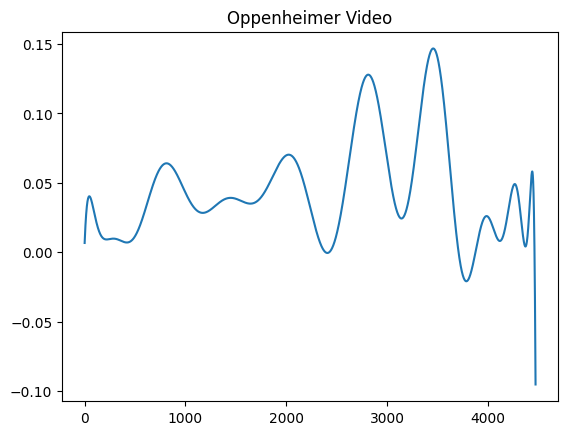

In [ ]:
plot_aprroximate(list_1 = range(frames) , list_2 = intensity_per_frame , approx = 30 , title = "Oppenheimer Video")

##5.2. Audio Intensity Graph

  plot_aprroximate(list_1 = range(frames) , list_2 = audio_per_frame , approx = 30 , title = "Oppenheimer audio")



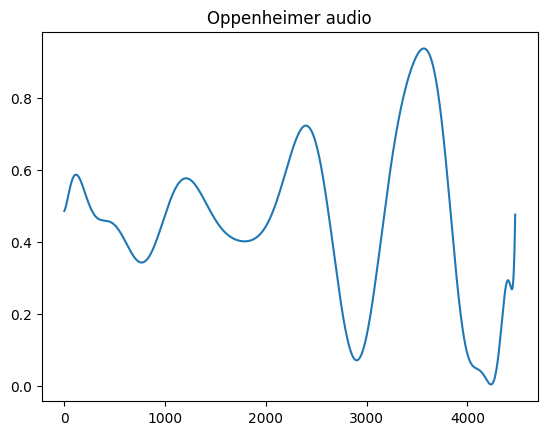

In [ ]:
plot_aprroximate(list_1 = range(frames) , list_2 = audio_per_frame , approx = 30 , title = "Oppenheimer audio")

##5.3. Video and Audio Combined Intensity Graph

  plot_aprroximate(list_1 = range(frames) , list_2 = combinatin_array , approx = 30 , title = "Oppenheimer video and audio")



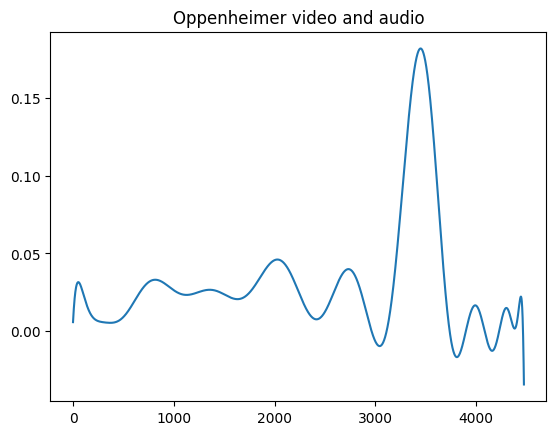

In [ ]:
plot_aprroximate(list_1 = range(frames) , list_2 = combinatin_array , approx = 30 , title = "Oppenheimer video and audio")

#6. Combined Intensities Analysis of multiple Youtube Trailers

Frames downloaded successfully.
Frames downloaded successfully.
Frames downloaded successfully.
Frames downloaded successfully.
Frames downloaded successfully.
Frames downloaded successfully.


  return stacker(self.iter_chunks(fps=fps, quantize=quantize,



Frames downloaded successfully.


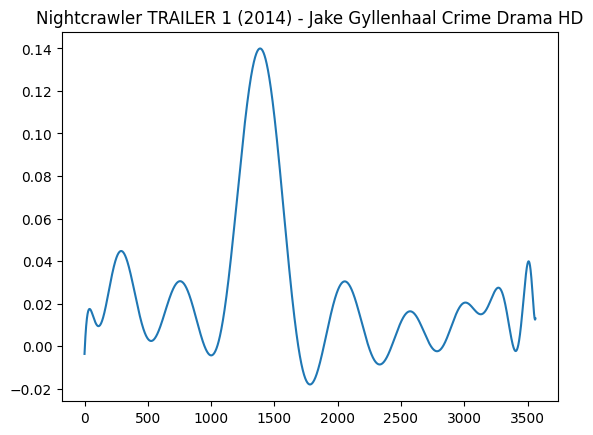

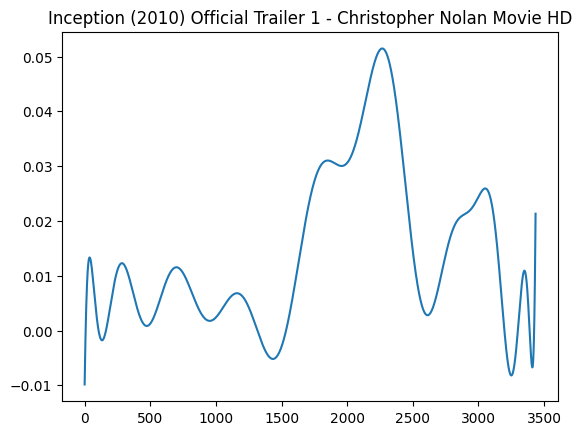

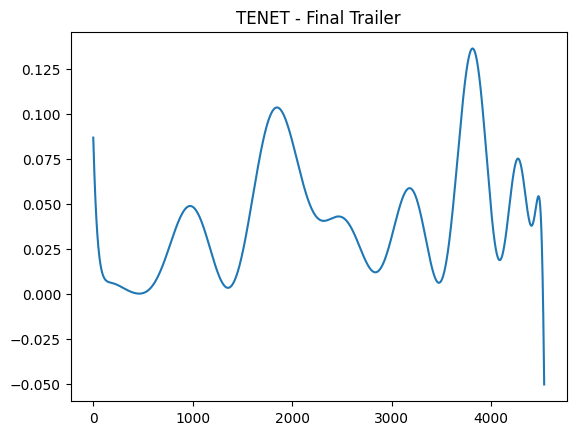

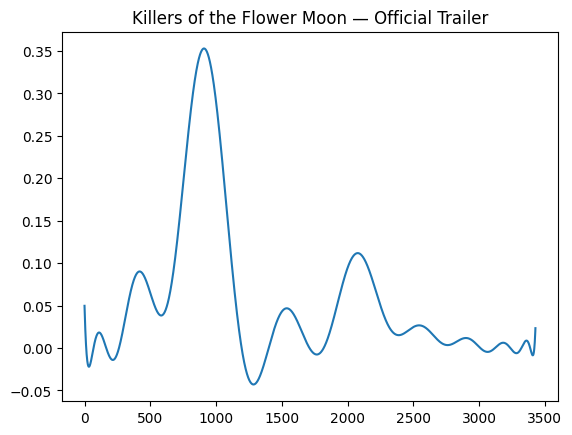

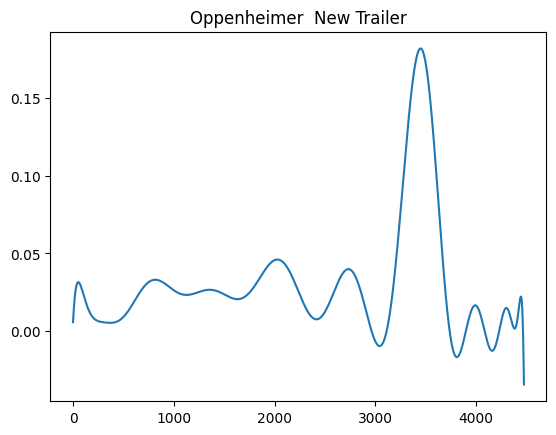

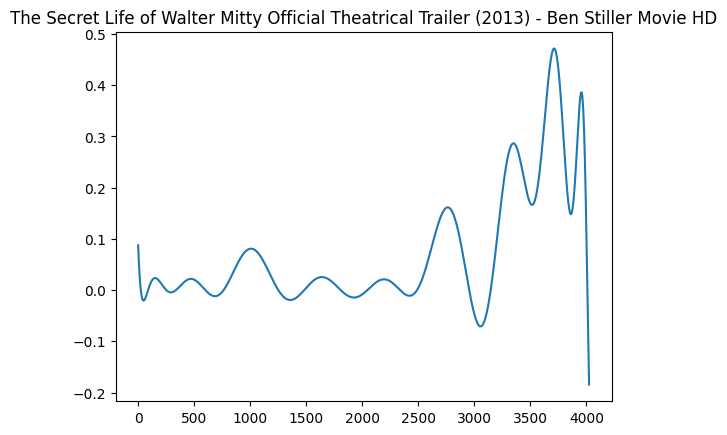

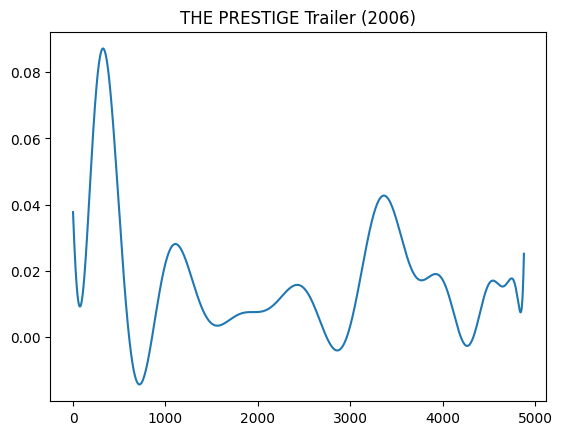

CPU times: user 1min 9s, sys: 12.5 s, total: 1min 21s
Wall time: 1min 5s


In [ ]:
%%time

videos_url = ["https://youtu.be/uYPbbksJxIg" ,"https://www.youtube.com/watch?v=kJBFB5GE8Ow" ,
              "https://www.youtube.com/watch?v=EP34Yoxs3FQ" ,"https://www.youtube.com/watch?v=u1uP_8VJkDQ" ,
              "https://www.youtube.com/watch?v=YoHD9XEInc0" , "https://www.youtube.com/watch?v=AZGcmvrTX9M" ,
              "https://www.youtube.com/watch?v=ELq7V8vkekI"]

file_name = os.listdir("/content/video.mp4")

for content_number in range(len(videos_url)):

  download(videos_url[content_number])

file_name = os.listdir("./video.mp4")

total_array = np.linspace(0.0, 0.0, 2500)

for content_name in file_name:
  if content_name != ".ipynb_checkpoints":
    frames , intensity_per_frame , audio_per_frame = intensity(path = f'/content/video.mp4/{content_name}')

    combination_array = intensity_per_frame * (1.5 * audio_per_frame)
    total_array += combination_array[:2500]
    plot_aprroximate(list_1 = range(combination_array.shape[0]) , list_2 = combination_array , approx = 30 , title = content_name.split(".")[0])


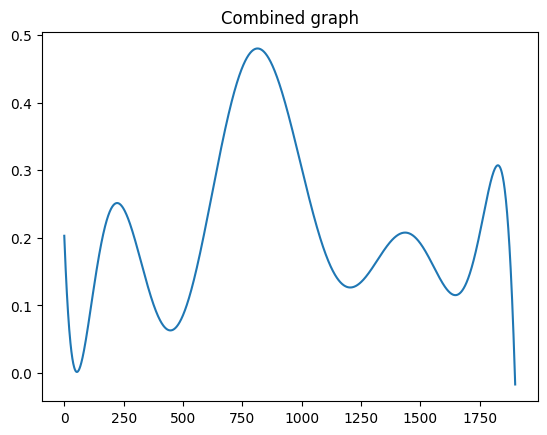

In [ ]:
plot_aprroximate(list_1 = range(2000-100) , list_2 = total_array[100:2000] , approx = 10 , title = "Combined graph")